<a href="https://colab.research.google.com/github/nhanguyenai/HomeWork-Predict/blob/main/fasterCNNrecognFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch torchvision matplotlib opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.6 MB/s eta 0:00:00


In [2]:
import os
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [9]:
data_dir = "/content/drive/MyDrive/dataset/face_dataset"


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = datasets.ImageFolder(data_dir, transform=transform)
class_names = dataset.classes
print("Lớp:", class_names)

from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Lớp: ['Hải', 'Nam', 'Nhã', 'Phúc']


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, 4)

model = model.to(device)


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

def train_model(model, train_loader, val_loader, epochs=50):
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}, Val Acc: {acc:.2f}%")

train_model(model, train_loader, val_loader)


Epoch 1, Loss: 4.7264, Val Acc: 100.00%
Epoch 2, Loss: 0.9327, Val Acc: 100.00%
Epoch 3, Loss: 0.1647, Val Acc: 100.00%
Epoch 4, Loss: 0.1425, Val Acc: 100.00%
Epoch 5, Loss: 0.0755, Val Acc: 100.00%
Epoch 6, Loss: 0.4464, Val Acc: 100.00%
Epoch 7, Loss: 0.0408, Val Acc: 100.00%
Epoch 8, Loss: 0.1837, Val Acc: 100.00%
Epoch 9, Loss: 0.0672, Val Acc: 100.00%
Epoch 10, Loss: 0.0327, Val Acc: 100.00%
Epoch 11, Loss: 0.0491, Val Acc: 100.00%
Epoch 12, Loss: 0.0523, Val Acc: 100.00%
Epoch 13, Loss: 0.1088, Val Acc: 100.00%
Epoch 14, Loss: 0.0180, Val Acc: 100.00%
Epoch 15, Loss: 0.1494, Val Acc: 100.00%
Epoch 16, Loss: 0.0195, Val Acc: 100.00%
Epoch 17, Loss: 0.1016, Val Acc: 100.00%
Epoch 18, Loss: 0.0186, Val Acc: 100.00%
Epoch 19, Loss: 0.0272, Val Acc: 100.00%
Epoch 20, Loss: 0.1695, Val Acc: 100.00%
Epoch 21, Loss: 0.0351, Val Acc: 100.00%
Epoch 22, Loss: 0.2119, Val Acc: 100.00%
Epoch 23, Loss: 0.0303, Val Acc: 100.00%
Epoch 24, Loss: 0.0298, Val Acc: 100.00%
Epoch 25, Loss: 0.0482, V

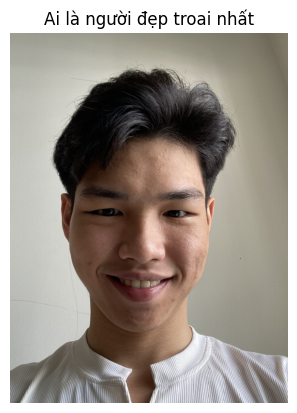

Là tôi chứ ai: Hải


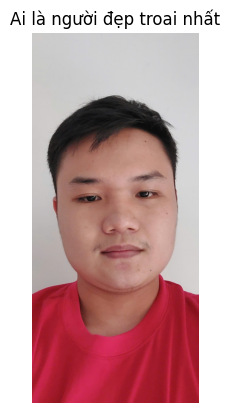

Là tôi chứ ai: Nhã


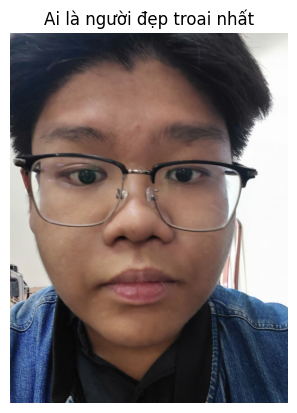

Là tôi chứ ai: Phúc


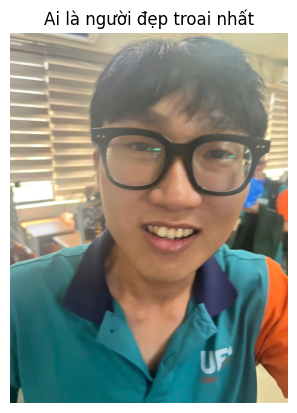

Là tôi chứ ai: Nam


'Nam'

In [41]:
#nhan dien mat
from PIL import Image
import matplotlib.pyplot as plt
import torch

def predict_image(image_path, model):
    image = Image.open(image_path).convert("RGB")

    plt.imshow(image)
    plt.axis("off")
    plt.title("Ai là người đẹp troai nhất")
    plt.show()

    model.eval()
    image_tensor = transform(image).unsqueeze(0).to(device)
    output = model(image_tensor)
    _, pred = torch.max(output, 1)
    predicted_name = class_names[pred.item()]

    print(f"Là tôi chứ ai: {predicted_name}")
    return predicted_name

img_path1 = "/content/z6523165770097_42c4c466af907516e837d8b6b4e1662f.jpg"
predict_image(img_path1, model)
img_path2 = "/content/z6523191581020_1a5802b544a0fffa242f51a1c3a6f9aa.jpg"
predict_image(img_path2, model)
img_path3 = "/content/z6523169827808_b60aa44c01bfc3ba4f0fec89de1b3cf5.jpg"
predict_image(img_path3, model)
img_path4 = "/content/z6523186276396_76bc6c9198e38c00962e4a41cfb17b7a.jpg"
predict_image(img_path4, model)


In [21]:
def save_model(model, path="model.pth"):
    torch.save(model.state_dict(), path)
    print(f"✅ Đã lưu mô hình tại: {path}")


In [22]:
save_model(model, "face_recognition_model.pth")

✅ Đã lưu mô hình tại: face_recognition_model.pth


In [23]:
#Nhan dien cam xuc
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

emotion_data_dir = "/content/drive/MyDrive/dataset/emotion_dataset"

emotion_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

emotion_dataset = datasets.ImageFolder(emotion_data_dir, transform=emotion_transform)
emotion_classes = emotion_dataset.classes
print("Các loại cảm xúc:", emotion_classes)

train_size = int(0.8 * len(emotion_dataset))
val_size = len(emotion_dataset) - train_size
emotion_train, emotion_val = random_split(emotion_dataset, [train_size, val_size])

emotion_train_loader = DataLoader(emotion_train, batch_size=32, shuffle=True)
emotion_val_loader = DataLoader(emotion_val, batch_size=32, shuffle=False)


Các loại cảm xúc: ['angry', 'happy', 'sad']


In [24]:
from torchvision import models
import torch.nn as nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

emotion_model = models.mobilenet_v2(pretrained=True)
emotion_model.classifier[1] = nn.Linear(emotion_model.last_channel, len(emotion_classes))
emotion_model = emotion_model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(emotion_model.parameters(), lr=0.0001)

def train_emotion_model(model, train_loader, val_loader, epochs=50):
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        print(f"[Epoch {epoch+1}] Loss: {running_loss:.4f}, Val Accuracy: {acc:.2f}%")

train_emotion_model(emotion_model, emotion_train_loader, emotion_val_loader)


[Epoch 1] Loss: 6.2722, Val Accuracy: 83.33%
[Epoch 2] Loss: 2.3158, Val Accuracy: 98.33%
[Epoch 3] Loss: 0.8190, Val Accuracy: 100.00%
[Epoch 4] Loss: 0.3612, Val Accuracy: 100.00%
[Epoch 5] Loss: 0.1351, Val Accuracy: 100.00%
[Epoch 6] Loss: 0.0745, Val Accuracy: 100.00%
[Epoch 7] Loss: 0.0595, Val Accuracy: 100.00%
[Epoch 8] Loss: 0.0234, Val Accuracy: 100.00%
[Epoch 9] Loss: 0.0354, Val Accuracy: 100.00%
[Epoch 10] Loss: 0.0243, Val Accuracy: 100.00%
[Epoch 11] Loss: 0.0219, Val Accuracy: 100.00%
[Epoch 12] Loss: 0.0159, Val Accuracy: 100.00%
[Epoch 13] Loss: 0.0214, Val Accuracy: 100.00%
[Epoch 14] Loss: 0.0134, Val Accuracy: 100.00%
[Epoch 15] Loss: 0.0238, Val Accuracy: 100.00%
[Epoch 16] Loss: 0.0117, Val Accuracy: 100.00%
[Epoch 17] Loss: 0.0162, Val Accuracy: 100.00%
[Epoch 18] Loss: 0.0120, Val Accuracy: 100.00%
[Epoch 19] Loss: 0.0299, Val Accuracy: 100.00%
[Epoch 20] Loss: 0.0101, Val Accuracy: 100.00%
[Epoch 21] Loss: 0.0080, Val Accuracy: 100.00%
[Epoch 22] Loss: 0.0076,

In [26]:
save_model(emotion_model, "emotion_model.pth")

✅ Đã lưu mô hình tại: emotion_model.pth


In [27]:
from PIL import Image

def predict_emotion(image_path, model):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    image_tensor = emotion_transform(image).unsqueeze(0).to(device)
    output = model(image_tensor)
    _, pred = torch.max(output, 1)
    return emotion_classes[pred.item()]


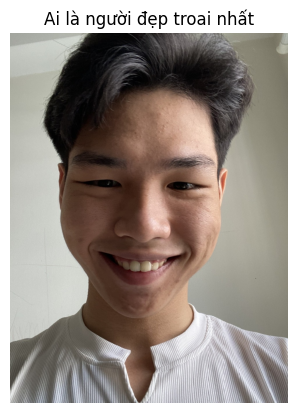

Là tôi chứ ai: Hải
Người được nhận diện: Hải
Cảm xúc của tôi hiện tại là: happy


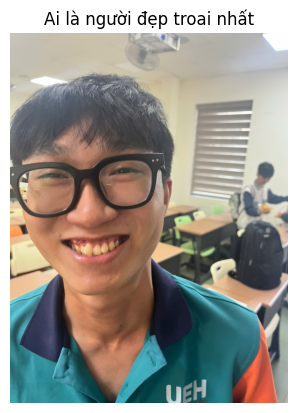

Là tôi chứ ai: Nam
Người được nhận diện: Nam
Cảm xúc của tôi hiện tại là: happy


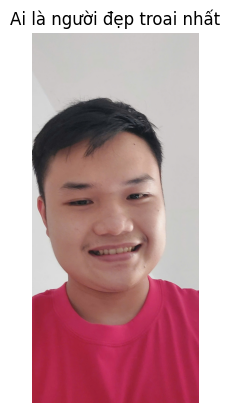

Là tôi chứ ai: Nhã
Người được nhận diện: Nam
Cảm xúc của tôi hiện tại là: happy


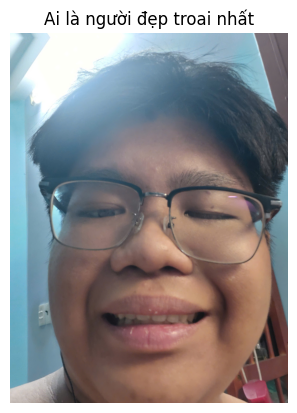

Là tôi chứ ai: Phúc
Người được nhận diện: Nam
Cảm xúc của tôi hiện tại là: happy


In [43]:
def predict_person_and_emotion(image_path, model_person, model_emotion):
    person = predict_image(image_path, model_person)
    emotion = predict_emotion(image_path, model_emotion)
    return person, emotion

person1, emotion1 = predict_person_and_emotion("/content/cuoi5.jpg", model, emotion_model)
print(f"Người được nhận diện: {person1}")
print(f"Cảm xúc của tôi hiện tại là: {emotion1}")
person2, emotion2 = predict_person_and_emotion("/content/cuoi1.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")
person3, emotion3 = predict_person_and_emotion("/content/cuoi2.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")
person4, emotion4 = predict_person_and_emotion("/content/cuoi4.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")

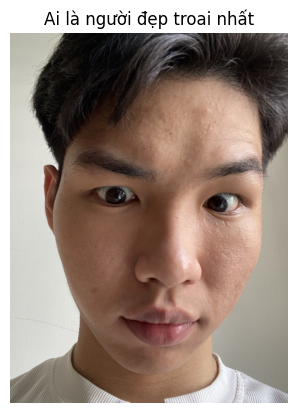

Là tôi chứ ai: Hải
Người được nhận diện: Hải
Cảm xúc của tôi hiện tại là: angry


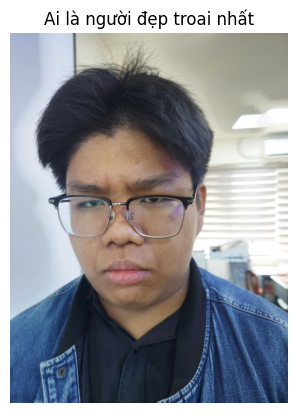

Là tôi chứ ai: Phúc
Người được nhận diện: Phúc
Cảm xúc của tôi hiện tại là: angry


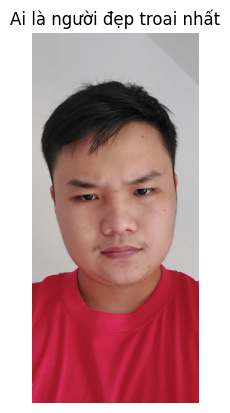

Là tôi chứ ai: Nhã
Người được nhận diện: Phúc
Cảm xúc của tôi hiện tại là: angry


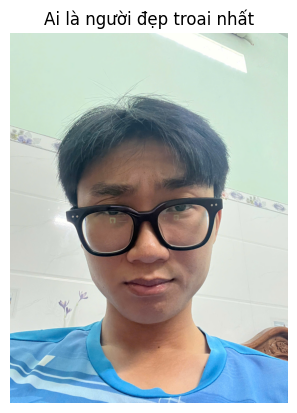

Là tôi chứ ai: Nam
Người được nhận diện: Phúc
Cảm xúc của tôi hiện tại là: angry


In [44]:
def predict_person_and_emotion(image_path, model_person, model_emotion):
    person = predict_image(image_path, model_person)
    emotion = predict_emotion(image_path, model_emotion)
    return person, emotion

person1, emotion1 = predict_person_and_emotion("/content/angry1.jpg", model, emotion_model)
print(f"Người được nhận diện: {person1}")
print(f"Cảm xúc của tôi hiện tại là: {emotion1}")
person2, emotion2 = predict_person_and_emotion("/content/angry2.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")
person3, emotion3 = predict_person_and_emotion("/content/angry3.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")
person4, emotion4 = predict_person_and_emotion("/content/angry4.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")

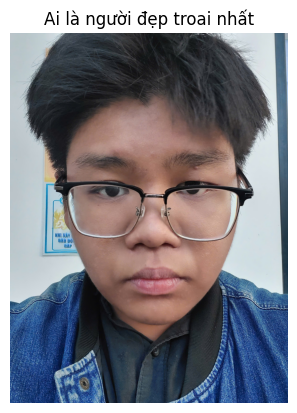

Là tôi chứ ai: Phúc
Người được nhận diện: Phúc
Cảm xúc của tôi hiện tại là: sad


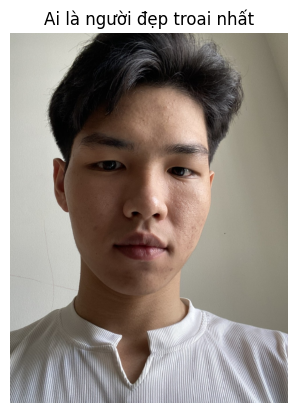

Là tôi chứ ai: Hải
Người được nhận diện: Hải
Cảm xúc của tôi hiện tại là: sad


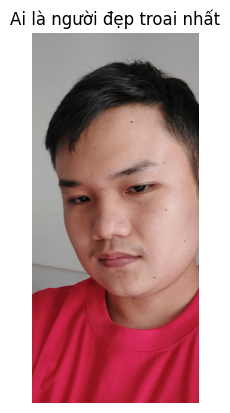

Là tôi chứ ai: Nhã
Người được nhận diện: Hải
Cảm xúc của tôi hiện tại là: sad


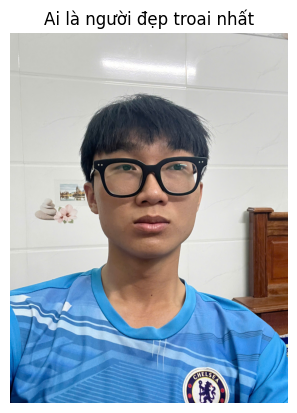

Là tôi chứ ai: Nam
Người được nhận diện: Hải
Cảm xúc của tôi hiện tại là: sad


In [45]:
def predict_person_and_emotion(image_path, model_person, model_emotion):
    person = predict_image(image_path, model_person)
    emotion = predict_emotion(image_path, model_emotion)
    return person, emotion

person1, emotion1 = predict_person_and_emotion("/content/sad1.jpg", model, emotion_model)
print(f"Người được nhận diện: {person1}")
print(f"Cảm xúc của tôi hiện tại là: {emotion1}")
person2, emotion2 = predict_person_and_emotion("/content/sad2.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")
person3, emotion3 = predict_person_and_emotion("/content/sad3.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")
person4, emotion4 = predict_person_and_emotion("/content/sad4.jpg", model, emotion_model)
print(f"Người được nhận diện: {person2}")
print(f"Cảm xúc của tôi hiện tại là: {emotion2}")